In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Classification

In [2]:
iris= load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
x= iris.data
y= iris.target

df= pd.DataFrame(x, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
new_df = df.copy()

In [7]:
new_df['class'] = y
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


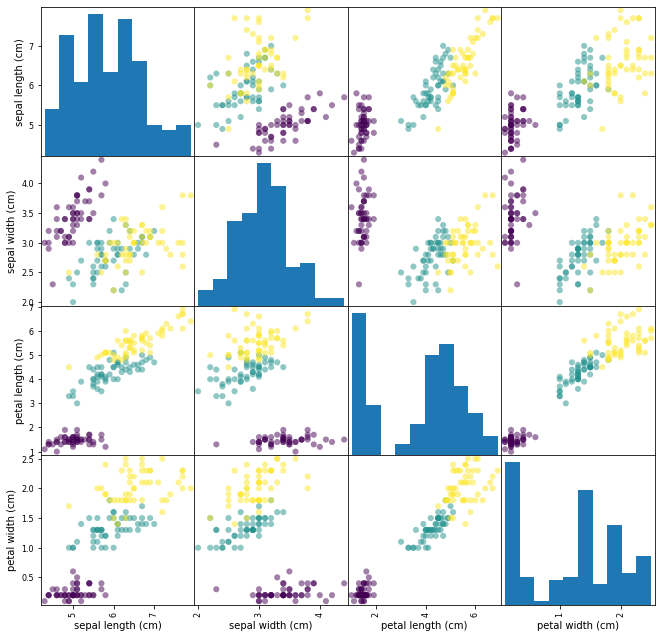

In [8]:
matrix_scatter= pd.plotting.scatter_matrix(df, c=y, figsize= [11,11], s=150)

0= setosa , 1 = versicolour, 2 = virginica

In [9]:
X= new_df.drop('class', axis=1) #fitur
y= new_df['class'] #target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [11]:
dt= DecisionTreeClassifier(max_depth=2, random_state=1)

In [12]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

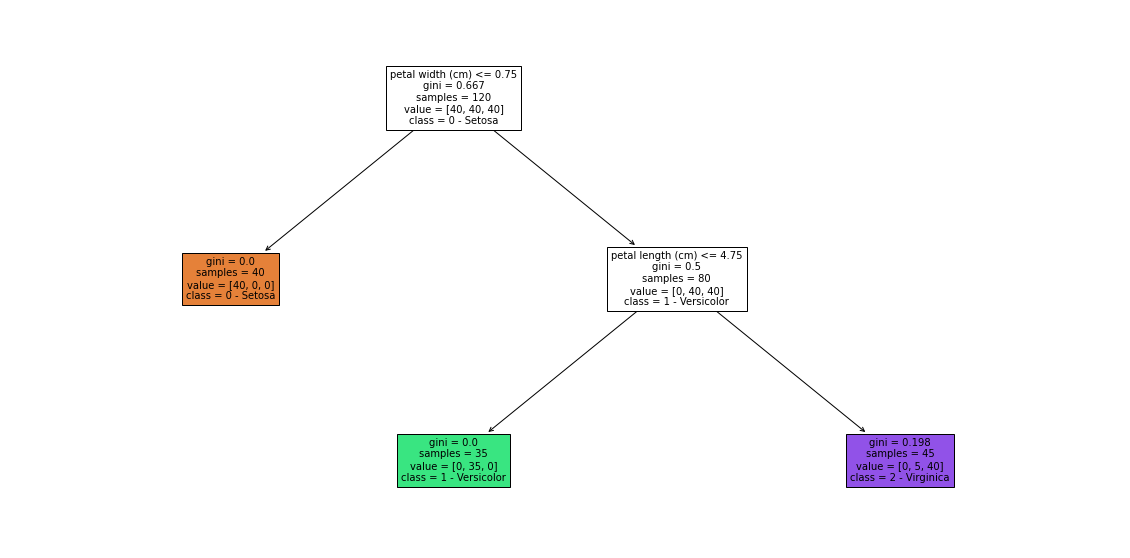

In [13]:
from sklearn import tree

plt.figure(figsize=(20,10))
# X.columns =df.columns
tree.plot_tree(dt, feature_names=X.columns, class_names=['0 - Setosa', '1 - Versicolor', '2 - Virginica'], filled=True, fontsize= 10)
plt.show()


In [14]:
dt_pred_train= dt.predict(X_train)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

print('DecisionTreeClassifier \n', classification_report(y_train, dt_pred_train))

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.88      0.93        40
           2       0.89      1.00      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [17]:
dt_pred_val= dt.predict(X_test)
print('DecisionTreeClassifier \n', classification_report(y_test, dt_pred_val))

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [18]:
print('training set score:', dt.score(X_train, y_train))
print('validation set score:', dt.score(X_test, y_test))

training set score: 0.9583333333333334
validation set score: 0.9333333333333333


# Hyperparameter tuning

In [19]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2,9),
    'min_samples_split': np.arange(2,9)
}

In [20]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

In [21]:
dt= DecisionTreeClassifier(random_state=1)
dt_grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score=True)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             return_train_score=True, scoring='accuracy')

In [22]:
print('best params:', dt_grid.best_params_)
print('best score:', dt_grid.best_score_)

best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
best score: 0.9416666666666667


In [23]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=3, random_state=1)


In [24]:
dt_train_p = dt_best.predict(X_train)
dt_val_p = dt_best.predict(X_test)

In [25]:
print('training set: \n', classification_report(y_train, dt_train_p))

training set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.97      0.94        40
           2       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [26]:
print('test set: \n', classification_report(y_test, dt_val_p))

test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Model Inference

In [27]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# create a list with values different from values in the DataFrame
X_new = pd.DataFrame({
    'sepal length': [5.1, 5.9, 6.9],
    'sepal width': [3.3, 3.0, 3.1],
    'petal length': [1.7, 4.2, 5.4],
    'petal width': [0.5, 1.5, 2.1]
})

X_cek = pd.DataFrame({
    'sepal length': [5.1, 5.9, 6.9, 5.0],
    'sepal width': [3.3, 3.0, 3.1, 6.0],
    'petal length': [1.7, 4.2, 5.4, 7.0],
    'petal width': [0.5, 1.5, 2.1, 4.0]
})

#check apakah nilai dalam dataframe X_new terdapat di dataframe X
print(X_new.isin(X))
print(X_new.isin(X_cek))


   sepal length  sepal width  petal length  petal width
0         False        False         False        False
1         False        False         False        False
2         False        False         False        False
   sepal length  sepal width  petal length  petal width
0          True         True          True         True
1          True         True          True         True
2          True         True          True         True


In [29]:
#check apakah new_data terdapat di dataframe X
new_data = [[5.1, 3.6, 1.4, 0.3]]

print(pd.DataFrame(new_data).isin(X))

       0      1      2      3
0  False  False  False  False


In [30]:
dt_best.predict(new_data)

array([0])

In [31]:
new_predictions = dt_best.predict(new_data)
if new_predictions == [1.]:
    print('versicolour')
elif new_predictions == [2.]:
    print('verginica')
else:
    print('setosa')

setosa


In [32]:
res_pred= dt_best.predict(X_new)
#create a dataframe with concat X_new and the results
res_pred_df= pd.DataFrame(res_pred, columns=['predictions'])

#concat X_new and the results
res_pred_df= pd.concat([X_new, res_pred_df], axis=1)
res_pred_df


,sepal length,sepal width,petal length,petal width,predictions
0,5.1,3.3,1.7,0.5,0
1,5.9,3.0,4.2,1.5,1
2,6.9,3.1,5.4,2.1,2


### Regression

In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [34]:
boston = datasets.load_boston()
print('Dataset structure= ', dir(boston))

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']


In [35]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24.0,666.0,20.2,383.32,13.11,21.4
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54,23.4
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0


In [36]:
#Lets create feature matrix X  and y labels
X = df.drop('target', axis=1)
y = df['target']
print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (506, 13)
y shape= (506,)


In [37]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (404, 13)
X_test dimension=  (102, 13)
y_train dimension=  (404,)
y_train dimension=  (102,)


In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 1)
dtr.fit(X_train ,y_train)

DecisionTreeRegressor(random_state=1)

In [39]:
from sklearn.metrics import mean_squared_error 

y_pred_train = dtr.predict(X_train)
mean_squared_error(y_train, y_pred_train)

0.0

In [40]:
y_pred = dtr.predict(X_test)
mean_squared_error(y_test, y_pred)

31.99411764705883

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtm = GridSearchCV(dtr, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [42]:
print("Best Score:{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters:\n{}".format(grid_cv_dtm.best_params_))

Best Score:0.3965495865472047
Best Hyperparameters:
{'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [43]:
best_dtm = grid_cv_dtm.best_estimator_
best_dtm

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, min_samples_leaf=20,
                      min_samples_split=10, random_state=1)

In [44]:
y_pred_train2 = best_dtm.predict(X_train)
print('mse train: ', mean_squared_error(y_train, y_pred_train2))

y_pred_test2 = best_dtm.predict(X_test)
print('mse test: ', mean_squared_error(y_test, y_pred_test2))

mse train:  15.613453932448504
mse test:  11.076501554783013


In [45]:
new_data = [[0.15, 25 ,5.13, 0.0, 0.453, 6.145, 29.2, 7.8148, 8.0, 284, 19.7, 390.6, 6.86]]

best_dtm.predict(new_data)

array([24.086])

In [46]:
predicted_price= pd.DataFrame(best_dtm.predict(X_test), columns=['Predicted Price'])
actual_price = pd.DataFrame(y_test, columns=['target'])
actual_price = actual_price.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actual_price,predicted_price],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
target,28.200000,23.900,16.600000,22.0000,20.800000,23.000000,27.900,14.500000,21.500000,22.600000,...,13.600000,22.900000,10.900,18.900000,22.400000,22.900000,44.800000,21.700000,10.200000,15.400
Predicted Price,24.703704,24.086,20.020833,20.9375,21.122222,21.122222,31.565,19.661364,18.078125,28.671429,...,18.078125,21.863636,13.245,21.863636,28.671429,24.703704,45.096667,19.661364,14.804348,13.245
